
# Jeanette's Workbook

<hr style="border:2px solid red"> </hr>


### Detecting Anomalies on the Codeup Curriculum Website

We recieved a fake email from a staff member at Codeup:
  
  
Hello,
  
  
I have some questions for you that I need to be answered before the Board meeting on Monday evening. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.
  
  
1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?
  
  
Thank you,
  
Mr. Codeup

#### My responsibilities for this project will be the README, the Presentation slide, and questions [2, 4, 5, 8].
Note: Due to the time constraint my work will probably seem sporatic. I will try to comment as much as I can!

In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

import wrangle

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle.acquire_logs()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        847330 non-null  object
 1   time        847330 non-null  object
 2   path        847329 non-null  object
 3   ip          847330 non-null  object
 4   user_id     847330 non-null  int64 
 5   name        847330 non-null  object
 6   program_id  847330 non-null  int64 
 7   start_date  847330 non-null  object
 8   end_date    847330 non-null  object
dtypes: int64(2), object(7)
memory usage: 64.6+ MB


In [4]:
df = wrangle.wrangle_logs()
df.head()

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2018-01-26 09:55:03,/,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java


In [5]:
df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [6]:
df.user_id.value_counts()

11     17913
64     16322
53     12329
314     7783
1       7404
       ...  
879        1
940        1
163        1
165        1
652        1
Name: user_id, Length: 911, dtype: int64

The first question I will try to answer is:
## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

Additional thoughts:
- What is a lesson? I will assume it is a page that is not a supporting page (like overview or index). I will assume it is a non-supportive page within a module.

In [7]:
# How many cohorts does this dataset have?
print(df.name.value_counts().count())
df.name.value_counts()

47


Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Darden        32015
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Bayes         26538
Wrangell      25586
Andromeda     25359
Kalypso       23691
Curie         21582
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Easley        14715
Lassen         9587
Arches         8890
Florence       8562
Sequoia        7444
Neptune        7276
Olympic        4954
Kings          2845
Pinnacles      2158
Hampton        1712
Oberon         1672
Quincy         1237
Niagara         755
Mammoth         691
Glacier         598
Joshua          302
Ike             253
Badlands         93
Franklin         72
Apollo            5
Denali            4
Everglades        1
Name: name, dtype: int64

In [8]:
# Let's see pages viewed and how many of those were unqiue pages
page_views = df.groupby(['name'])['path'].agg(['count', 'nunique'])
page_views

,count,nunique
name,,
Andromeda,25359,366
Apex,33568,273
Apollo,5,4
Arches,8890,342
Badlands,93,44
Bash,17713,275
Bayes,26538,533
Betelgeuse,29356,334
Ceres,40730,301


In [9]:
# How many programs do they have?
df.program_name.value_counts(sort=True)

WebDev-Java    713365
DataSci        103412
WebDev-PHP      30548
FrontEnd            5
Name: program_name, dtype: int64

In [10]:
# Which pages are looked at the most?
df.path.value_counts(sort=True).head(10)

/                           45854
javascript-i                18203
toc                         17591
search/search_index.json    17534
java-iii                    13166
html-css                    13127
java-ii                     12177
spring                      11883
jquery                      11041
mysql                       10611
Name: path, dtype: int64

#### I should probably divide the search by Web Dev and Data Science since they access different pages. Let's see what page is popular for each program...

In [11]:
# Most frequented pages for Web Dev students
df[df.program_name.str.startswith('Web')].path.value_counts(sort=True).head(10)

/                           37495
javascript-i                18193
toc                         17580
search/search_index.json    15331
java-iii                    13162
html-css                    13111
java-ii                     12173
spring                      11877
jquery                      11037
mysql                       10602
Name: path, dtype: int64

In [12]:
# Most frequented pages for Data Scientist students
df[df.program_name.str.startswith('Data')].path.value_counts(sort=True).head(10)

/                                           8358
search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
Name: path, dtype: int64

#### Takeaway: 
- There are 46 Cohorts and one Staff.
- Some of these cohorts have less than 100 pages accessed. Could these be outliers?
- Top Data Science pages visited are jpegs in the Fundamentals: Intro to Data Science.
- The home page of the curriculum is accessed 37,495 times by Web Dev students and 8,358 times by Data Scientists. This is to be expected since Codeup started thier Web Dev program before Data Science.

#### Possible Answer:
I'm too stupid to figure this out

## 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [106]:
df.head()

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2018-01-26 09:55:03,/,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java


In [115]:
df.shape

(847330, 8)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847330 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   path          847329 non-null  object
 1   ip            847330 non-null  object
 2   user_id       847330 non-null  int64 
 3   name          847330 non-null  object
 4   program_id    847330 non-null  int64 
 5   start_date    847330 non-null  object
 6   end_date      847330 non-null  object
 7   program_name  847330 non-null  object
dtypes: int64(2), object(6)
memory usage: 58.2+ MB


In [113]:
# How many unique ip addresses are there?
len(df.ip.unique())

5200

In [16]:
# Is there an ip adress that accessed multiple pages in a short time frame?
df.ip.index.value_counts().head(20)

2019-03-03 22:52:07    30
2019-03-03 22:52:09    30
2019-03-03 22:52:08    25
2019-03-03 22:52:10    25
2019-03-03 22:52:11    25
2019-03-03 22:52:06    21
2020-08-02 19:07:51    16
2019-12-19 23:57:58    12
2019-03-03 22:52:12    12
2020-04-05 17:41:11    12
2019-12-19 23:58:01    12
2019-12-19 23:57:56    12
2019-12-19 23:57:59    11
2021-04-01 16:08:25    11
2020-04-05 17:42:00    10
2020-04-05 17:41:10    10
2019-12-19 23:58:00    10
2020-08-02 19:07:50    10
2019-12-19 23:58:03     9
2019-12-19 23:58:05     9
dtype: int64

In [17]:
# Let's take a look at that day and see if we can find the ip that accessed 272 pages in 4 seconds
df['2019-03-03'].groupby('user_id').agg('count').sort_values('path', ascending= False).head()

,path,ip,name,program_id,start_date,end_date,program_name
user_id,,,,,,,
341,272,272,272,272,272,272,272
344,82,82,82,82,82,82,82
337,24,24,24,24,24,24,24
324,22,22,22,22,22,22,22
261,20,20,20,20,20,20,20


In [81]:
cohort_pages = df.groupby(['name', 'path']).agg('count')
cohort_pages

ip  user_id  program_id  \
name      path                                                                  
Andromeda /                                         1174     1174        1174   
          1-fundamentals/1.1-intro-to-data-science     1        1           1   
          1-fundamentals/1.2-data-science-pipeline     1        1           1   
          1-fundamentals/1.3-pipeline-demo             1        1           1   
          1-fundamentals/AI-ML-DL-timeline.jpg         1        1           1   
...                                                  ...      ...         ...   
Zion      uploads/598dc43df39e2.jpg                    1        1           1   
          web-design/intro                             1        1           1   
          web-design/ui/visuals                        1        1           1   
          web-design/ux/layout                         1        1           1   
          web-design/ux/purpose                        1        1           1   

                                                    start_date  end_date  \
name      path                                                             
Andromeda /                                               1174      1174   
          1-fundamentals/1.1-intro-to-data-science           1         1   
          1-fundamentals/1.2-data-science-pipeline           1         1   
          1-fundamentals/1.3-pipeline-demo                   1         1   
          1-fundamentals/AI-ML-DL-timeline.jpg               1         1   
...                                                        ...       ...   
Zion      uploads/598dc43df39e2.jpg                          1         1   
          web-design/intro                                   1         1   
          web-design/ui/visuals                              1         1   
          web-design/ux/layout                               1         1   
          web-design/ux/purpose                              1         1   

                                                    program_name  
name      path                                                    
Andromeda /                                                 1174  
          1-fundamentals/1.1-intro-to-data-science             1  
          1-fundamentals/1.2-data-science-pipeline             1  
          1-fundamentals/1.3-pipeline-demo                     1  
          1-fundamentals/AI-ML-DL-timeline.jpg                 1  
...                                                          ...  
Zion      uploads/598dc43df39e2.jpg                            1  
          web-design/intro                                     1  
          web-design/ui/visuals                                1  
          web-design/ux/layout                                 1  
          web-design/ux/purpose                                1  

[13565 rows x 6 columns]

In [101]:
Java_cohort_list = sorted(df[df.program_name=='WebDev-Java'].name.unique())
Java_cohort_list

['Andromeda',
 'Apex',
 'Bash',
 'Betelgeuse',
 'Ceres',
 'Deimos',
 'Europa',
 'Fortuna',
 'Ganymede',
 'Hyperion',
 'Jupiter',
 'Kalypso',
 'Luna',
 'Mammoth',
 'Marco',
 'Neptune',
 'Niagara',
 'Oberon',
 'Pinnacles',
 'Sequoia',
 'Staff',
 'Teddy',
 'Ulysses',
 'Voyageurs',
 'Wrangell',
 'Xanadu',
 'Yosemite',
 'Zion']

In [102]:
# Now to compare Java cohorts
for cohort in Java_cohort_list:
    print(cohort)
    print(df[df.name== cohort].path.value_counts().head())
    print('')

Andromeda
/               1174
toc              638
javascript-i     516
spring           487
java-iii         433
Name: path, dtype: int64

Apex
search/search_index.json    1497
/                           1346
toc                          810
html-css                     738
javascript-i                 669
Name: path, dtype: int64

Bash
/                           772
search/search_index.json    660
toc                         404
javascript-i                374
java-iii                    324
Name: path, dtype: int64

Betelgeuse
/                           955
search/search_index.json    761
javascript-i                717
toc                         610
jquery                      542
Name: path, dtype: int64

Ceres
/                           1653
search/search_index.json    1380
javascript-i                1003
toc                          911
html-css                     766
Name: path, dtype: int64

Deimos
/                           1467
javascript-i                 896
html-

In [79]:
cohort_pages.columns

Index(['ip', 'user_id', 'program_id', 'start_date', 'end_date',
       'program_name'],
      dtype='object')

#### Takeaway: 
- There are no nulls in this dataframe, no suspicious activity here
- User_ID 341 accessed 272 pages in 4 seconds in March of 2019, highly probable web scraping here  
- Voyageurs looked at the mysql lesson 663 times, a lesson that does not appear in the top 5 of the other Java programs

#### Possible Answer:
There is evidence of possible web scraping from one user.

## 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [19]:
df.head()

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2018-01-26 09:55:03,/,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java


In [20]:
df[['program_id', 'program_name']].value_counts(sort=False)

program_id  program_name
1           WebDev-PHP       30548
2           WebDev-Java     713365
3           DataSci         103412
4           FrontEnd             5
dtype: int64

In [21]:
# where a user_id has more than one program ID?
df[['user_id', 'program_id']].value_counts() 

user_id  program_id
11       2             15178
64       2             12555
53       1              8197
495      2              6451
428      2              5819
                       ...  
165      2                 1
163      1                 1
918      2                 1
592      2                 1
212      1                 1
Length: 932, dtype: int64

In [23]:
# Let's single someone out and see if they did indeed access more than one program
df[df.user_id== 428]

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2019-06-04 17:37:52,javascript-i/conditionals,24.243.55.34,428,Quincy,1,2017-06-05,2017-09-22,WebDev-PHP
2019-06-04 17:39:04,javascript-with-html,24.243.55.34,428,Quincy,1,2017-06-05,2017-09-22,WebDev-PHP
2019-06-04 17:39:07,introduction,24.243.55.34,428,Quincy,1,2017-06-05,2017-09-22,WebDev-PHP
2019-06-04 17:39:10,introduction,24.243.55.34,428,Quincy,1,2017-06-05,2017-09-22,WebDev-PHP
2019-06-04 17:39:13,/,24.243.55.34,428,Quincy,1,2017-06-05,2017-09-22,WebDev-PHP
...,...,...,...,...,...,...,...,...
2021-03-23 15:27:16,spring/extra-features/form-validation,70.121.183.95,428,Staff,2,2014-02-04,2014-02-04,WebDev-Java
2021-04-05 11:14:01,jquery/ajax/weather-map,70.121.183.95,428,Staff,2,2014-02-04,2014-02-04,WebDev-Java
2021-04-08 16:22:19,jquery/ajax/weather-map,70.121.183.95,428,Quincy,1,2017-06-05,2017-09-22,WebDev-PHP
2021-04-08 16:22:26,/,70.121.183.95,428,Quincy,1,2017-06-05,2017-09-22,WebDev-PHP


#### User 428 became a staff member! That's why they accessed more than one program.

In [24]:
user_vs_program = df[['user_id', 'program_id']].groupby(['user_id', 'program_id']).agg('count')
user_vs_program

Empty DataFrame
Columns: []
Index: [(1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (10, 2), (11, 1), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 2), (29, 2), (30, 2), (31, 2), (32, 2), (33, 2), (34, 2), (35, 2), (36, 2), (37, 1), (37, 2), (38, 2), (39, 2), (40, 2), (41, 2), (42, 2), (43, 2), (44, 2), (45, 2), (46, 2), (47, 2), (49, 2), (50, 1), (51, 1), (52, 2), (53, 1), (53, 2), (55, 2), (56, 2), (57, 2), (60, 1), (64, 1), (64, 2), (65, 2), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (75, 1), (76, 2), (77, 1), (80, 1), (81, 2), (82, 1), (83, 2), (84, 2), (85, 1), (87, 1), (88, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 2), (101, 1), (102, 1), (104, 2), (105, 1), (106, 1), (107, 2), (108, 2), (109, 1), (110, 2), ...]

[932 rows x 0 columns]

Upon visual inspection of the dataframe these are the users that looked at more than one program:  
1, 11, 37, 53, 64, 118, 143, 146, 148, 211, 248, 257, 268, 312, 314, 419, 428, 480, 513, 581, 895

In [26]:
user_list = [1, 11, 37, 53, 64, 118, 143, 146, 148, 211, 248, 257, 268, 312, 314, 419, 428, 480, 513, 581, 895]

In [32]:
staff_list = df[df.name == 'Staff'].groupby('user_id').count().index

In [35]:
not_staff = []
for user in user_list:
    if user in staff_list:
        continue
    else:
        not_staff.append(user)

not_staff

[118, 143, 268, 419, 895]

In [38]:
# Now that I have a list down to 5, I can inspect why they might have viewed different programs
df[(df.user_id == 118) & (df.program_id != 2)]

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2018-06-11 08:40:05,/,137.242.1.129,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP
2018-06-11 08:40:07,/,137.242.1.129,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP
2018-06-11 08:40:33,html-css,137.242.1.129,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP
2018-06-11 08:40:43,java-i,137.242.1.129,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP
2018-06-11 08:40:49,java-i/introduction-to-java,137.242.1.129,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP
2018-06-11 08:41:20,java-i/syntax-types-and-variables,137.242.1.129,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP
2018-06-11 08:41:24,java-i/console-io,137.242.1.129,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP
2018-07-09 07:32:53,/,137.242.1.128,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP
2018-07-09 07:32:58,/,137.242.1.128,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP
2018-07-09 07:33:03,java-i,137.242.1.128,118,Kings,1,2016-05-23,2016-09-15,WebDev-PHP


In [39]:
df[(df.user_id == 118) & (df.program_id == 2)]

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2018-03-05 14:26:44,/,97.105.19.61,118,Ulysses,2,2018-03-05,2018-07-19,WebDev-Java
2018-03-05 15:27:31,html-css,97.105.19.61,118,Ulysses,2,2018-03-05,2018-07-19,WebDev-Java
2018-03-05 15:28:15,html-css,97.105.19.61,118,Ulysses,2,2018-03-05,2018-07-19,WebDev-Java
2018-03-05 15:31:44,html-css/introduction,97.105.19.61,118,Ulysses,2,2018-03-05,2018-07-19,WebDev-Java
2018-03-05 16:55:46,html-css,97.105.19.61,118,Ulysses,2,2018-03-05,2018-07-19,WebDev-Java
...,...,...,...,...,...,...,...,...
2020-03-13 15:23:44,java-iii,99.147.236.67,118,Ulysses,2,2018-03-05,2018-07-19,WebDev-Java
2020-03-13 15:23:48,java-iii/servlets,99.147.236.67,118,Ulysses,2,2018-03-05,2018-07-19,WebDev-Java
2020-04-23 14:30:55,/,99.147.236.67,118,Ulysses,2,2018-03-05,2018-07-19,WebDev-Java
2020-04-23 14:30:58,mysql,99.147.236.67,118,Ulysses,2,2018-03-05,2018-07-19,WebDev-Java


In [42]:
# Okay now USER 143 
df[(df.user_id == 143) & (df.program_id == 2)] 

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2018-03-18 15:24:59,index.html,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java
2018-03-18 15:25:01,mysql,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java
2018-03-18 15:25:04,mysql/introduction,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java
2018-03-18 15:25:05,mysql/users,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java
2018-03-18 15:25:07,mysql/introduction,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java
2018-04-09 18:05:48,index.html,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java
2018-04-09 18:05:50,mysql,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java
2018-04-09 18:05:53,mysql/introduction,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java
2018-04-09 18:07:24,mysql/tables,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java
2018-04-09 18:10:49,mysql/basic-statements,173.174.192.127,143,Niagara,2,2016-10-26,2017-03-09,WebDev-Java


In [45]:
# Okay now USER 143 
df[(df.user_id == 143) & (df.program_id == 3)] 

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2020-12-08 10:54:45,/,68.201.242.151,143,Easley,3,2020-12-07,2021-06-08,DataSci
2020-12-08 10:58:31,fundamentals/intro-to-data-science,68.201.242.151,143,Easley,3,2020-12-07,2021-06-08,DataSci
2020-12-08 10:58:31,fundamentals/modern-data-scientist.jpg,68.201.242.151,143,Easley,3,2020-12-07,2021-06-08,DataSci
2020-12-08 10:58:32,fundamentals/AI-ML-DL-timeline.jpg,68.201.242.151,143,Easley,3,2020-12-07,2021-06-08,DataSci
2020-12-08 15:13:06,fundamentals/data-science-pipeline,68.201.242.151,143,Easley,3,2020-12-07,2021-06-08,DataSci
...,...,...,...,...,...,...,...,...
2021-04-19 15:20:55,timeseries/modeling-lesson1,173.174.194.60,143,Easley,3,2020-12-07,2021-06-08,DataSci
2021-04-21 09:15:32,anomaly-detection/overview,173.174.194.60,143,Easley,3,2020-12-07,2021-06-08,DataSci
2021-04-21 09:15:32,anomaly-detection/AnomalyDetectionCartoon.jpeg,173.174.194.60,143,Easley,3,2020-12-07,2021-06-08,DataSci
2021-04-21 11:09:00,anomaly-detection/continuous-probabilistic-met...,173.174.194.60,143,Easley,3,2020-12-07,2021-06-08,DataSci


In [47]:
# Okay now USER 268 
df[(df.user_id == 268) & (df.program_id == 2)] 

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2018-09-17 14:16:56,/,97.105.19.58,268,Xanadu,2,2018-09-17,2019-02-08,WebDev-Java
2018-09-17 14:17:10,toc,97.105.19.58,268,Xanadu,2,2018-09-17,2019-02-08,WebDev-Java
2018-09-17 14:17:42,toc,97.105.19.58,268,Xanadu,2,2018-09-17,2019-02-08,WebDev-Java
2018-09-17 14:19:50,html-css,97.105.19.58,268,Xanadu,2,2018-09-17,2019-02-08,WebDev-Java
2018-09-17 15:05:42,html-css/introduction,97.105.19.58,268,Xanadu,2,2018-09-17,2019-02-08,WebDev-Java
...,...,...,...,...,...,...,...,...
2018-10-01 14:58:39,javascript-i/introduction/variables,97.105.19.58,268,Xanadu,2,2018-09-17,2019-02-08,WebDev-Java
2018-10-01 15:12:38,javascript-i/introduction/working-with-data-ty...,97.105.19.58,268,Xanadu,2,2018-09-17,2019-02-08,WebDev-Java
2018-10-01 16:10:14,javascript-i/javascript-with-html,97.105.19.58,268,Xanadu,2,2018-09-17,2019-02-08,WebDev-Java
2018-10-01 16:34:55,javascript-i/introduction/working-with-data-ty...,97.105.19.58,268,Xanadu,2,2018-09-17,2019-02-08,WebDev-Java


In [48]:
df[(df.user_id == 268) & (df.program_id == 3)] 

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2020-07-13 14:52:10,/,173.174.200.226,268,Darden,3,2020-07-13,2021-01-12,DataSci
2020-07-14 16:06:42,1-fundamentals/1.1-intro-to-data-science,173.174.200.226,268,Darden,3,2020-07-13,2021-01-12,DataSci
2020-07-14 16:06:42,1-fundamentals/modern-data-scientist.jpg,173.174.200.226,268,Darden,3,2020-07-13,2021-01-12,DataSci
2020-07-14 16:06:42,1-fundamentals/AI-ML-DL-timeline.jpg,173.174.200.226,268,Darden,3,2020-07-13,2021-01-12,DataSci
2020-07-14 16:36:13,1-fundamentals/1.2-data-science-pipeline,173.174.200.226,268,Darden,3,2020-07-13,2021-01-12,DataSci
...,...,...,...,...,...,...,...,...
2021-03-11 15:14:07,classification/acquire,98.6.75.74,268,Darden,3,2020-07-13,2021-01-12,DataSci
2021-03-11 15:16:09,classification/prep,98.6.75.74,268,Darden,3,2020-07-13,2021-01-12,DataSci
2021-03-12 08:52:49,classification/tidy-data,98.6.75.74,268,Darden,3,2020-07-13,2021-01-12,DataSci
2021-03-12 09:05:33,classification/explore,98.6.75.74,268,Darden,3,2020-07-13,2021-01-12,DataSci


In [59]:
df[(df.user_id == 419) & (df.program_id == 1)] 

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2020-01-24 15:09:08,/,72.181.98.75,419,Olympic,1,2017-02-06,2017-05-25,WebDev-PHP
2020-01-24 15:10:54,content/php_ii,72.181.98.75,419,Olympic,1,2017-02-06,2017-05-25,WebDev-PHP
2020-01-24 15:10:55,content/php_ii/gitbook/images/favicon.ico,72.181.98.75,419,Olympic,1,2017-02-06,2017-05-25,WebDev-PHP
2020-01-24 15:11:18,content/php_ii/control-structures-i,72.181.98.75,419,Olympic,1,2017-02-06,2017-05-25,WebDev-PHP
2020-01-24 15:11:18,content/php_ii/control-structures-i/gitbook/im...,72.181.98.75,419,Olympic,1,2017-02-06,2017-05-25,WebDev-PHP
...,...,...,...,...,...,...,...,...
2020-03-31 11:53:55,content/php_iii,72.181.98.75,419,Olympic,1,2017-02-06,2017-05-25,WebDev-PHP
2020-03-31 11:53:55,content/php_iii/gitbook/images/favicon.ico,72.181.98.75,419,Olympic,1,2017-02-06,2017-05-25,WebDev-PHP
2020-03-31 11:54:01,content/php_iii/php-with-html,72.181.98.75,419,Olympic,1,2017-02-06,2017-05-25,WebDev-PHP
2020-03-31 11:54:01,content/php_iii/php-with-html/gitbook/images/f...,72.181.98.75,419,Olympic,1,2017-02-06,2017-05-25,WebDev-PHP


User 419
Cohort Betelgeuse 
Start 2019-05-28	
End 2019-10-08	


User 419
Cohort Olympic 
Start 2017-02-06		
End 2017-05-25	


In [56]:
df[(df.user_id == 419) & (df.program_id !=1)] 

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2019-05-29 10:02:03,/,97.105.19.58,419,Betelgeuse,2,2019-05-28,2019-10-08,WebDev-Java
2019-05-29 10:10:10,search/search_index.json,97.105.19.58,419,Betelgeuse,2,2019-05-28,2019-10-08,WebDev-Java
2019-05-29 11:58:26,html-css,97.105.19.58,419,Betelgeuse,2,2019-05-28,2019-10-08,WebDev-Java
2019-05-29 12:02:20,html-css/introduction,97.105.19.58,419,Betelgeuse,2,2019-05-28,2019-10-08,WebDev-Java
2019-05-29 14:19:08,html-css/forms,97.105.19.58,419,Betelgeuse,2,2019-05-28,2019-10-08,WebDev-Java
...,...,...,...,...,...,...,...,...
2020-12-23 11:42:18,spring/setup,72.181.98.75,419,Betelgeuse,2,2019-05-28,2019-10-08,WebDev-Java
2020-12-23 12:06:46,spring,72.181.98.75,419,Betelgeuse,2,2019-05-28,2019-10-08,WebDev-Java
2020-12-23 12:06:53,spring/fundamentals/controllers,72.181.98.75,419,Betelgeuse,2,2019-05-28,2019-10-08,WebDev-Java
2020-12-23 12:07:03,spring/fundamentals/views,72.181.98.75,419,Betelgeuse,2,2019-05-28,2019-10-08,WebDev-Java


In [64]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.index)
    df = df.set_index(df.date)
    pages_one_user = df['path'].resample('d').count()
    return pages_one_user

Text(0.5, 1.0, 'User 419 Curriculum Access')

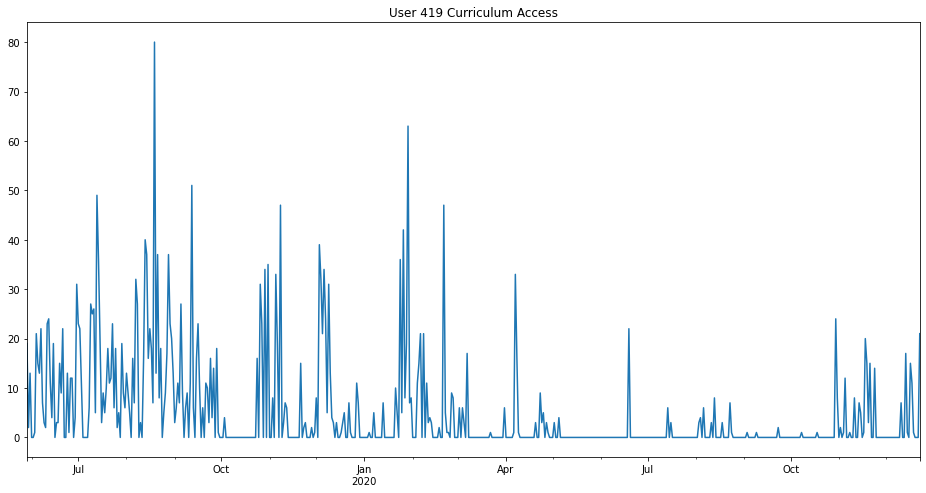

In [66]:
df_419 = one_user_df_prep(df, 419)
df_419.plot(figsize=(16,8))
plt.title("User 419 Curriculum Access")

In [69]:
df[(df.user_id == 895) & (df.program_id ==2)] 

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2021-03-15 15:22:31,/,96.8.253.119,895,Neptune,2,2021-03-15,2021-09-03,WebDev-Java
2021-03-15 15:28:21,/,96.8.253.119,895,Neptune,2,2021-03-15,2021-09-03,WebDev-Java
2021-03-15 15:29:04,/,96.8.253.119,895,Neptune,2,2021-03-15,2021-09-03,WebDev-Java
2021-03-15 15:30:47,/,96.8.253.119,895,Neptune,2,2021-03-15,2021-09-03,WebDev-Java
2021-03-15 15:31:59,/,96.8.253.119,895,Neptune,2,2021-03-15,2021-09-03,WebDev-Java
2021-03-15 15:34:05,/,96.8.253.119,895,Neptune,2,2021-03-15,2021-09-03,WebDev-Java


In [70]:
df[(df.user_id == 895) & (df.program_id !=2)] 

,path,ip,user_id,name,program_id,start_date,end_date,program_name
2021-03-15 15:47:10,/,96.8.253.119,895,Florence,3,2021-03-15,2021-09-03,DataSci
2021-03-15 15:54:06,/,96.8.253.119,895,Florence,3,2021-03-15,2021-09-03,DataSci
2021-03-15 16:13:29,fundamentals/intro-to-data-science,96.8.253.119,895,Florence,3,2021-03-15,2021-09-03,DataSci
2021-03-15 16:13:30,fundamentals/modern-data-scientist.jpg,96.8.253.119,895,Florence,3,2021-03-15,2021-09-03,DataSci
2021-03-15 16:13:30,fundamentals/AI-ML-DL-timeline.jpg,96.8.253.119,895,Florence,3,2021-03-15,2021-09-03,DataSci
...,...,...,...,...,...,...,...,...
2021-04-21 08:17:01,fundamentals/git,96.8.253.119,895,Florence,3,2021-03-15,2021-09-03,DataSci
2021-04-21 08:27:17,sql/mysql-overview,96.8.253.119,895,Florence,3,2021-03-15,2021-09-03,DataSci
2021-04-21 08:27:25,python/advanced-dataframes,96.8.253.119,895,Florence,3,2021-03-15,2021-09-03,DataSci
2021-04-21 09:10:19,python/dataframes,96.8.253.119,895,Florence,3,2021-03-15,2021-09-03,DataSci


#### Takeaway: 
- User 428 became a staff member! That's why they accessed more than one program. There are more than one instances of this occuring.
- User 118, 143, 268 look like they dropped out and then returned later to complete the course
- User 419 is suspicious but I can't conclude anything. I looks like they might have changed programs at one point but thier program start/end dates do not match thier curriculum access dates
- User 895 only accessed the home page of the WebDev-Java curriculum for 12 minutes before looking at the "correct" program, Data Science.

#### Possible Answer:
There is evidence of possible web scraping from one user.

## 8. Anything else I should be aware of?

In [ ]:
[118, 143, 268, 419, 895]